# Gradient Descent
## Faqih Mahardika (21/482551/PA21039)

### Import dependencies

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import os 


### Variables


n = number of neuron in hidden layer <br>
wb = weights and bias at end <br>
dwb = derivatives of weights and bias at end <br>
h = delta for gradient descent

In [2]:
t = [1,2,3,4,5,6]
y = [100,500,600,200,400,300]
yp = [0] * len(y)
w1,w2,w3,b = 0.1,0.1,0.1,0.1
dw1,dw2,dw3,db = 0.1,0.1,0.1,0.1
h = 10 **(-8)

In [3]:
# storing epoch data history
alpha = 10 **(-8)
w1s = []
w2s = []
w3s = []
wbs = []
yps = []
SEs = []
norm_ds = []

## functions

In [4]:
def yp_(i):
    global w1,w2,w3,b,yp,y
    if i < 2:
        return y[i]
    else:
        return w1*yp[i-1] + w2*yp[i-2] + b #+ w2*yp[i-3]

In [5]:
def yp_new(i,w1,w2):
    global w3,yp,y,b
    if i < 2:
        return y[i]
    else:
        return w1*yp[i-1] + w2*yp[i-2] + b #+ w2*yp[i-3]

In [6]:
def SE_():
    sum = 0
    for i, val in enumerate(yp):
        yp[i] = yp_(i)
        sum += (yp[i]-y[i])**2
    return sum

In [7]:
# def SE_new(w1,w2):
#     sum = 0
#     for i, val in enumerate(yp):
#         yp[i] = yp_new(i,w1,w2)
#         sum += (yp[i]-y[i])**2
#     return sum

def SE_new(w1, w2):
    yp_local = [0] * len(y)  # Create a local yp to avoid state issues
    sum = 0
    for i, val in enumerate(yp_local):
        yp_local[i] = yp_new(i, w1, w2)
        sum += (yp_local[i] - y[i])**2
    return sum


In [8]:
def grad_():
    global w1,w2,w3,b,dw1,dw2,dw3,db
    temp = w1

    w1 = temp + h
    SE1 = SE_()
    w1 = temp - h
    SE2 = SE_()
    dw1 = (SE1 - SE2)/(2*h)
    w1 = temp

    temp = w2
    w2 = temp + h
    SE1 = SE_()
    w2 = temp - h
    SE2 = SE_()
    dw2 = (SE1 - SE2)/(2*h)
    w2 = temp

    # temp = w3
    # w3 = temp + h
    # SE1 = SE_()
    # w3 = temp - h
    # SE2 = SE_()
    # dw3 = (SE1 - SE2)/(2*h)
    # w3 = temp

    temp = b
    b = temp + h
    SE1 = SE_()
    b = temp - h
    SE2 = SE_()
    db = (SE1 - SE2)/(2*h)
    b = temp


In [9]:
def update_weight():
    global w1,w2,w3,b,dw1,dw2,dw3,db,alpha
    w1 = w1 - (alpha*dw1)
    w2 = w2 - (alpha*dw2)
    # w3 = w3 - (alpha*dw3)
    b = b - (alpha*db)


In [10]:
def norm_d():
    return (dw1*dw1 + dw2*dw2 + dw3*dw3 + db*db)**(1/2)

In [11]:
from IPython.display import clear_output
import time

norm_d_ = 1000  # Initialize norm_d_ to start the loop
count = 0
while norm_d_ > 43:  # Continue until the gradient norm is small enough
    clear_output(wait=True)  # Clear the previous output
    grad_()
    update_weight()
    w1s.append(w1)
    w2s.append(w2)
    # w3s.append(w3)
    SEs.append(SE_())
    norm_d_ = norm_d()
    count += 1
    if count%20 == 0:
        print("SE :", SE_())
        print("norm_d :", norm_d_)
        time.sleep(0.1)  # Add a short delay to see the output (optional)


SE : 61280.339759888186
norm_d : 42.99634225788967


In [12]:
print("making the SEs Value ...")
SEs_new = np.zeros((len(w1s), len(w2s)))  # Create a 2D NumPy array for SEs_new
for i, w1_val in enumerate(w1s):
    for j, w2_val in enumerate(w2s):
        SEs_new[i][j] = SE_new(w1_val, w2_val)


making the SEs Value ...


## plots

In [13]:
def plot_SEs(SEs):
    plt.figure(figsize=(10, 6))
    plt.plot(SEs, marker='o', linestyle='-', color='b', label='Sum of Squared Errors (SEs)')
    plt.title('Sum of Squared Errors (SEs) Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('SEs')
    plt.grid(True)
    plt.legend()
    plt.show()

In [14]:
# plot_SEs(SEs)

## 3d plot

In [15]:
X, Y = np.meshgrid(w1s, w2s)
Z = SEs_new
# Z = np.array(SEs_new).reshape(X.shape)


In [16]:
# print(X)

In [17]:
# print(Y)

In [18]:
# Plotting the 3D mesh plot
def threedplot(X,Y,Z):
    # Create a new figure for the 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface using a color map (viridis)
    ax.plot_surface(X, Y, Z, cmap='viridis')

    # Labels for the axes
    ax.set_xlabel('Weight 1')
    ax.set_ylabel('Weight 2')
    ax.set_zlabel('Squared Error')

    # Title of the plot
    ax.set_title('Squared Error for Different Weight Combinations')

    # Display the plot
    plt.show()


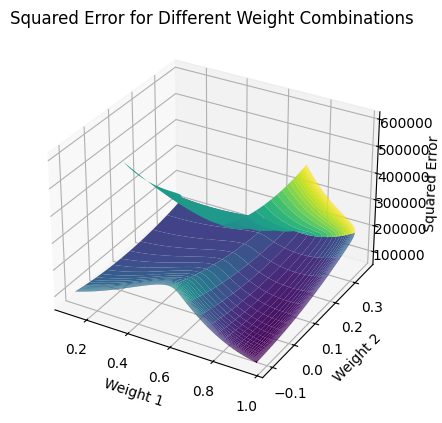

In [19]:
threedplot(X,Y,Z)

In [20]:
print(X.shape, Y.shape, Z.shape)


(3540, 3540) (3540, 3540) (3540, 3540)


In [21]:
print(SEs_new.shape)

(3540, 3540)
